# Inverted Repeats

# Exploratory Data Analysis


<span style="font-size:18.0pt;color:blue"> 
    
- IRP Count vs. Kmer Length <br>
- Density by taxonomy <br>
- correlation between GC content in arms and IR length <br>
- Are there dense hotspots of IRPs in each genome? <br>
- Are there taxonomic biases?- IRP Count vs. Kmer Length <br>
- Density by taxonomy <br>
- correlation between GC content in arms and IR length <br>
- Are there dense hotspots of IRPs in each genome? <br>
- Are there taxonomic biases? <br>
    
</span>

In [1]:
# data science
from scipy.stats import norm
import numpy as np
import sqlite3 as sql
import pandas as pd
from pathlib import Path
from termcolor import colored
from tqdm import tqdm
import gzip
import math

import upsetplot
from upsetplot import UpSet
from upsetplot import plot


# plotting
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
domains = ["Archaea", "Eukaryota", "Bacteria", "Viruses"]
domain_colors = {
                'Viruses': '#b2ebeb',
                'Eukaryota': '#ffb2b2',
                'Archaea': '#b2b2ff',
                'Bacteria': '#b2d8b2'
                }

In [3]:
irp_df = pd.read_csv("/storage/group/izg5139/default/nicole/inverted_repeats/paper_data/inverted_repeats_database.csv.gz")

<ipython-input-3-801d12b0f28e>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  irp_df = pd.read_csv("/storage/group/izg5139/default/nicole/inverted_repeats/paper_data/inverted_repeats_database.csv.gz")


In [4]:
empty_assemblies = pd.read_csv("/storage/group/izg5139/default/nicole/inverted_repeats/paper_data/empty_assemblies.csv")

In [98]:
irp_df.isnull().sum()

speciesID                 0
chromosome                0
start                     0
end                       0
arm_size                  0
sequenceof_arm            0
gap_size                  0
#assembly_accession       0
method                    0
found_in                  0
bioproject                0
taxid                     0
species_taxid             0
organism_name             0
assembly_level            0
group                     0
genome_size               0
gc_percent                0
total_gene_count          0
tax_id                    0
superkingdom              0
kingdom                   0
phylum                 5007
irp_gc_content            0
irp_gc_ratio              0
risk_ratio                0
dtype: int64

In [6]:
empty_assemblies

,#assembly_accession,bioproject,taxid,species_taxid,organism_name,assembly_level,group,genome_size,gc_percent,total_gene_count,assembly_id,method,tax_id,superkingdom,kingdom,phylum
0,GCA_031126015.1,na,707457.0,11983.0,Norovirus Hu/GII-4/Iwate4/2008/JP,Complete Genome,viral,7509.0,49.5,na,31126015.1,GCA,707457.0,Viruses,Orthornavirae,Pisuviricota
1,GCA_902994085.1,PRJEB35770,2100421.0,2100421.0,uncultured Caudovirales phage,Complete Genome,viral,55810.0,52.0,70,902994085.1,GCA,2100421.0,Viruses,Heunggongvirae,Uroviricota
2,GCA_002997805.1,na,2099442.0,2560596.0,Microbacterium phage Casey,Complete Genome,viral,39307.0,61.0,60,2997805.1,GCA,2099442.0,Viruses,Heunggongvirae,Uroviricota
3,GCA_031201265.1,na,2735958.0,2735958.0,Botrytis cinerea ourmia-like virus 8,Complete Genome,viral,2706.0,48.0,na,31201265.1,GCA,2735958.0,Viruses,Orthornavirae,Lenarviricota
4,GCA_003191345.1,na,11709.0,11709.0,Human immunodeficiency virus 2,Complete Genome,viral,9339.0,44.5,9,3191345.1,GCA,11709.0,Viruses,Pararnavirae,Artverviricota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26440,GCA_027589855.1,na,2202560.0,2202560.0,Inovirus sp.,Complete Genome,viral,4425.0,44.0,na,27589855.1,GCA,2202560.0,Viruses,Loebvirae,Hofneiviricota
26441,GCA_031313985.1,na,2937002.0,2937002.0,Copiparvovirus P192T/pangolin/2018,Complete Genome,viral,5282.0,40.5,na,31313985.1,GCA,2937002.0,Viruses,Shotokuvirae,Cossaviricota
26442,GCA_018550795.1,na,2786362.0,2844780.0,ssRNA phage Gerhypos.4_58,Complete Genome,viral,3840.0,54.5,4,18550795.1,GCA,2786362.0,Viruses,Orthornavirae,Lenarviricota
26443,GCA_002539485.1,na,310953.0,1986034.0,Enterobacteria phage ID11,Complete Genome,viral,5577.0,45.5,na,2539485.1,GCA,310953.0,Viruses,Sangervirae,Phixviricota


In [7]:
irp_df

,speciesID,chromosome,start,end,arm_size,sequenceof_arm,gap_size,#assembly_accession,method,found_in,...,genome_size,gc_percent,total_gene_count,tax_id,superkingdom,kingdom,phylum,irp_gc_content,irp_gc_ratio,risk_ratio
0,GCA_000002515.1_ASM251v1_genomic,CR382121.1,21717,21738,11,atgtatatata,0,GCA_000002515.1,GCA,eukaryota,...,10689156.0,0.385,5389,28985.0,Eukaryota,Fungi,Ascomycota,1,0.090909,0.236128
1,GCA_000002515.1_ASM251v1_genomic,CR382121.1,141115,141141,11,gattctgataa,5,GCA_000002515.1,GCA,eukaryota,...,10689156.0,0.385,5389,28985.0,Eukaryota,Fungi,Ascomycota,3,0.272727,0.708383
2,GCA_000002515.1_ASM251v1_genomic,CR382121.1,148944,148967,10,ttctttcatt,4,GCA_000002515.1,GCA,eukaryota,...,10689156.0,0.385,5389,28985.0,Eukaryota,Fungi,Ascomycota,2,0.200000,0.519481
3,GCA_000002515.1_ASM251v1_genomic,CR382121.1,151854,151885,14,aaattagcattagc,4,GCA_000002515.1,GCA,eukaryota,...,10689156.0,0.385,5389,28985.0,Eukaryota,Fungi,Ascomycota,4,0.285714,0.742115
4,GCA_000002515.1_ASM251v1_genomic,CR382121.1,153811,153858,24,acagaaagaagttgatcacgtgca,0,GCA_000002515.1,GCA,eukaryota,...,10689156.0,0.385,5389,28985.0,Eukaryota,Fungi,Ascomycota,10,0.416667,1.082251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22192639,GCF_026210865.1_ASM2621086v2_genomic,NC_078852.1,1533,1553,10,aatcatctaa,1,GCF_026210865.1,GCF,viral,...,13198.0,0.280,5,2742449.0,Viruses,Orthornavirae,Negarnaviricota,2,0.200000,0.714286
22192640,GCF_026568235.1_ASM2656823v1_genomic,NC_073212.1,5654,5674,10,aaggcccctt,1,GCF_026568235.1,GCF,viral,...,42689.0,0.495,65,2996091.0,Viruses,Heunggongvirae,Uroviricota,6,0.600000,1.212121
22192641,GCF_026568235.1_ASM2656823v1_genomic,NC_073212.1,27447,27473,10,taatacggca,7,GCF_026568235.1,GCF,viral,...,42689.0,0.495,65,2996091.0,Viruses,Heunggongvirae,Uroviricota,4,0.400000,0.808081
22192642,GCF_026568235.1_ASM2656823v1_genomic,NC_073212.1,40801,40827,10,atcccggtaa,7,GCF_026568235.1,GCF,viral,...,42689.0,0.495,65,2996091.0,Viruses,Heunggongvirae,Uroviricota,5,0.500000,1.010101


In [8]:
total_species = irp_df.species_taxid.nunique()
total_species

24700

In [9]:
total_unique_sequences = irp_df.sequenceof_arm.nunique()
total_unique_sequences

2778146

In [10]:
total_sequences = irp_df.shape[0]
total_sequences

22192644

In [11]:
def add_empty_assemblies(df):
    global empty_assemblies
    return pd.concat([df, empty_assemblies.set_index("#assembly_accession")[["superkingdom"]]], axis=0)

In [12]:
irp_accessions = irp_df.groupby("#assembly_accession").agg({
                                                          "arm_size": lambda ds: ds.sum() * 2,
                                                                         "gap_size": lambda ds: ds.sum(),
                                                          "superkingdom": "first",
                                                        "genome_size": "first"
                                    })\
                                    .assign(coverage=lambda ds: 1000 * (ds['arm_size'] + ds['gap_size']).div(ds['genome_size']))

irp_accessions = add_empty_assemblies(irp_accessions)
irp_accessions

,arm_size,gap_size,superkingdom,genome_size,coverage
#assembly_accession,,,,,
GCA_000002515.1,12436.0,1475.0,Eukaryota,10689156.0,1.301412
GCA_000002725.2,47940.0,4755.0,Eukaryota,32855089.0,1.603861
GCA_000002765.3,1149134.0,56924.0,Eukaryota,23292622.0,51.778542
GCA_000005825.2,15752.0,2869.0,Bacteria,4249248.0,4.382187
GCA_000005845.2,10478.0,2030.0,Bacteria,4641652.0,2.694730
...,...,...,...,...,...
GCA_027589855.1,NaN,NaN,Viruses,NaN,NaN
GCA_031313985.1,NaN,NaN,Viruses,NaN,NaN
GCA_018550795.1,NaN,NaN,Viruses,NaN,NaN


In [13]:
irp_accessions.loc[:, "coverage"] = irp_accessions['coverage'].replace(np.nan, 0.0)
irp_accessions

,arm_size,gap_size,superkingdom,genome_size,coverage
#assembly_accession,,,,,
GCA_000002515.1,12436.0,1475.0,Eukaryota,10689156.0,1.301412
GCA_000002725.2,47940.0,4755.0,Eukaryota,32855089.0,1.603861
GCA_000002765.3,1149134.0,56924.0,Eukaryota,23292622.0,51.778542
GCA_000005825.2,15752.0,2869.0,Bacteria,4249248.0,4.382187
GCA_000005845.2,10478.0,2030.0,Bacteria,4641652.0,2.694730
...,...,...,...,...,...
GCA_027589855.1,NaN,NaN,Viruses,NaN,0.000000
GCA_031313985.1,NaN,NaN,Viruses,NaN,0.000000
GCA_018550795.1,NaN,NaN,Viruses,NaN,0.000000


In [14]:
irp_accessions = irp_accessions.sort_values(by=['coverage'], ascending=False)
irp_accessions

,arm_size,gap_size,superkingdom,genome_size,coverage
#assembly_accession,,,,,
GCA_031202825.1,392.0,4.0,Viruses,2196.0,180.327869
GCA_004056055.1,294.0,2.0,Viruses,2001.0,147.926037
GCA_013087775.1,480.0,0.0,Viruses,5308.0,90.429540
GCA_031124205.1,510.0,0.0,Viruses,5671.0,89.931229
GCA_018595505.1,542.0,49.0,Viruses,8106.0,72.908956
...,...,...,...,...,...
GCA_003101075.1,NaN,NaN,Viruses,NaN,0.000000
GCA_004096075.1,NaN,NaN,Viruses,NaN,0.000000
GCA_000859085.1,NaN,NaN,Viruses,NaN,0.000000


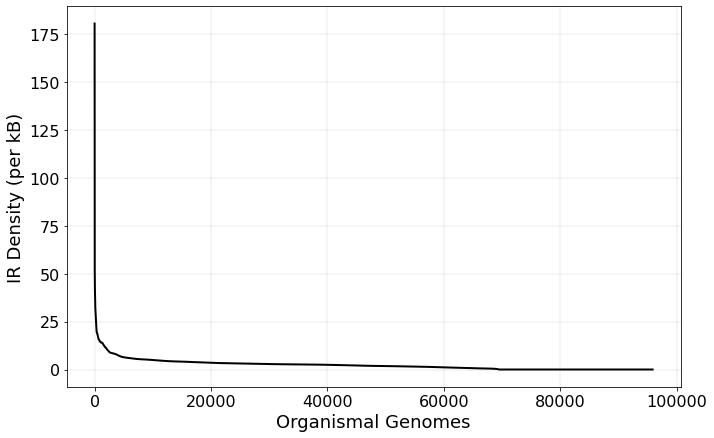

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 7))
irp_accessions.reset_index().reset_index().plot(x='index', y='coverage', lw=2.0, color='black', ax=ax)
ax.set_xlabel("Organismal Genomes")
ax.set_ylabel("IR Density (per kB)")
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.legend(handles=[], frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(lw=0.4, alpha=0.6)
fig.savefig("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/new_figs/organismal_genomes_irp.png", format="png", bbox_inches='tight')
plt.savefig("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/new_figs/organismal_genomes_irp.pdf", format="pdf", bbox_inches='tight')
plt.show()

# Venn & Upset

In [16]:
grouped_genome_size = irp_df.groupby("sequenceof_arm").agg(
                                                          total_arm=("arm_size", "first"), 
                                                          total_gap=("gap_size", "sum"),
                                                          gap_unique=("gap_size", lambda ds: set(ds.tolist())),
                                                          total_counts=("kingdom", "count"),
                                                          superkingdom=("superkingdom", lambda ds: set(ds.tolist())),
                                    )\
                            .sort_values(by=['total_counts'], ascending=False)

grouped_genome_size

,total_arm,total_gap,gap_unique,total_counts,superkingdom
sequenceof_arm,,,,,
atatatatat,10,80103,"{0, 1, 2, 3, 4, 5, 6, 7, 8}",90519,"{Bacteria, Viruses, Archaea, Eukaryota}"
tatatatata,10,77778,"{0, 1, 2, 3, 4, 5, 6, 7, 8}",78251,"{Bacteria, Viruses, Archaea, Eukaryota}"
atatatatata,11,83772,"{0, 1, 2, 3, 4, 5, 6, 7, 8}",72507,"{Bacteria, Viruses, Archaea, Eukaryota}"
tatatatatat,11,68022,"{0, 1, 2, 3, 4, 5, 6, 7, 8}",60893,"{Bacteria, Viruses, Archaea, Eukaryota}"
atatatatatat,12,32130,"{0, 1, 2, 3, 4, 5, 6, 7, 8}",49689,"{Bacteria, Viruses, Archaea, Eukaryota}"
...,...,...,...,...,...
cgtcgcggtggcc,13,8,{8},1,{Bacteria}
acaaaaggattttac,15,8,{8},1,{Bacteria}
cgtcgcggtgct,12,8,{8},1,{Bacteria}


In [17]:
grouped_genome_size = grouped_genome_size.sort_values(by=['total_counts'], ascending=False)\
                        .assign(arm_size=lambda df: df.index.map(len))\
                        .assign(gap_diversity=lambda df: df['gap_unique'].apply(len))

grouped_genome_size  ##.head(50)

,total_arm,total_gap,gap_unique,total_counts,superkingdom,arm_size,gap_diversity
sequenceof_arm,,,,,,,
atatatatat,10,80103,"{0, 1, 2, 3, 4, 5, 6, 7, 8}",90519,"{Bacteria, Viruses, Archaea, Eukaryota}",10,9
tatatatata,10,77778,"{0, 1, 2, 3, 4, 5, 6, 7, 8}",78251,"{Bacteria, Viruses, Archaea, Eukaryota}",10,9
atatatatata,11,83772,"{0, 1, 2, 3, 4, 5, 6, 7, 8}",72507,"{Bacteria, Viruses, Archaea, Eukaryota}",11,9
tatatatatat,11,68022,"{0, 1, 2, 3, 4, 5, 6, 7, 8}",60893,"{Bacteria, Viruses, Archaea, Eukaryota}",11,9
atatatatatat,12,32130,"{0, 1, 2, 3, 4, 5, 6, 7, 8}",49689,"{Bacteria, Viruses, Archaea, Eukaryota}",12,9
...,...,...,...,...,...,...,...
ttcacggtgtt,11,5,{5},1,{Eukaryota},11,1
ttcacggttca,11,2,{2},1,{Eukaryota},11,1
ttcacggtttc,11,3,{3},1,{Bacteria},11,1


In [18]:
irp_df.shape

(22192644, 26)

In [19]:
for domain in domains:
    grouped_genome_size.loc[:, domain] = grouped_genome_size['superkingdom'].apply(lambda d: domain in d)

In [20]:
grouped_genome_size.loc[:, 'gap_diversity'] = grouped_genome_size['gap_diversity'].apply(lambda x: x/9)

In [21]:
total_unique_sequences

2778146

In [22]:
upset_domains = grouped_genome_size.groupby(list(domains))\
                                    .agg({
                                          "arm_size": "mean", 
                                          "gap_diversity": "mean",
                                          "total_arm": "count",
                                         }
                                    )\
                                    .rename(
                                            columns={
                                                    "arm_size": "Mean Arm Size", 
                                                     "gap_diversity": "Spacer Diversity"
                                                }
                                        )\
                            .sort_values(by=['total_arm'], ascending=False)\
                            .assign(intersection=lambda x: x['total_arm'].apply(lambda y: math.log(y+1, 10)))
                            # .assign(proportion=lambda x: x['total_arm'].div(total_unique_sequences))
    
upset_domains

Mean Arm Size  Spacer Diversity  \
Archaea Eukaryota Bacteria Viruses                                    
False   False     True     False        14.234882          0.134472   
        True      False    False        14.649816          0.126084   
                  True     False        10.466412          0.349169   
        False     False    True         14.415341          0.112649   
True    False     False    False        12.369275          0.113527   
                  True     False        10.370050          0.372113   
False   False     True     True         10.828885          0.335080   
True    True      True     False        10.247783          0.632024   
False   True      True     True         10.482726          0.620833   
                  False    True         11.236455          0.283491   
True    True      False    False        10.506501          0.262369   
                  True     True         10.220818          0.911820   
        False     True     True         10.161215          0.582814   
                  False    True         10.318841          0.217391   
        True      False    True         10.578947          0.403509   

                                    total_arm  intersection  
Archaea Eukaryota Bacteria Viruses                           
False   False     True     False      2118534      6.326036  
        True      False    False       465347      5.667778  
                  True     False       108655      5.036054  
        False     False    True         22827      4.358468  
True    False     False    False        20700      4.315991  
                  True     False        14217      4.152839  
False   False     True     True         10116      4.005052  
True    True      True     False         6203      3.792672  
False   True      True     True          5326      3.726483  
                  False    True          2178      3.338257  
True    True      False    False         1846      3.266467  
                  True     True          1662      3.220892  
        False     True     True           428      2.632457  
                  False    True            69      1.845098  
        True      False    True            38      1.591065

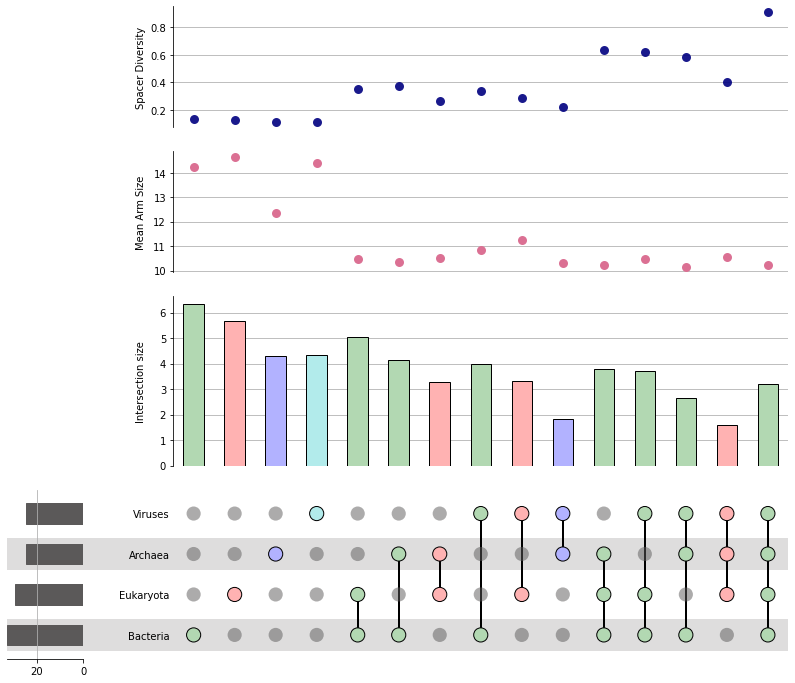

In [23]:
# UpSet plot it!

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 12))
upset = UpSet(upset_domains,# .assign(proportion=lambda ds: ds['proportion'].apply(lambda y: math.log(y+1, 10))), 
                subset_size="sum", 
              facecolor='#5B5959', 
              sum_over="intersection", 
              intersection_plot_elements=4, 
              element_size=None,
              other_dots_color=0.5,
              shading_color=0.2,
             )

upset.style_subsets(present=["Bacteria"],
                    facecolor=domain_colors["Bacteria"],
                    edgecolor="black"
                       )
    
upset.style_subsets(present=["Eukaryota"],
                        absent=["Bacteria"],
                    facecolor=domain_colors["Eukaryota"],
                    edgecolor="black"
                       )
upset.style_subsets(present=["Archaea"],
                        absent=["Bacteria", "Eukaryota"],
                    facecolor=domain_colors["Archaea"],
                    edgecolor="black"
                       )
upset.style_subsets(present=["Viruses"],
                        absent=["Bacteria", "Eukaryota", "Archaea"],
                    facecolor=domain_colors["Viruses"],
                    edgecolor="black"
                       )

# upset.style_subsets(
#                     present=["Bacteria", "Eukaryota"],
#                     absent=["Viruses", "Archaea"],
#                     facecolor="orange",
#                     edgecolor="black"
#                        )
# upset.style_subsets(
#                     present=["Archaea", "Eukaryota", "Bacteria"],
#                     absent=["Viruses"],
#                     facecolor="yellow",
#                     edgecolor="black"
#                        )


upset.add_catplot(value="Mean Arm Size", kind="strip", color="#DB7093", alpha=1.0, size=9)
upset.add_catplot(value="Spacer Diversity", kind="strip", color="navy", alpha=0.9, size=9)
upset.plot(fig=fig)
ax.axis("off")
ax.legend(handles=[], frameon=False)
# plt.tight_layout()
plt.savefig("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/upset_intersections.png", format="png", bbox_inches='tight')
plt.savefig("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/upset_intersections.pdf", format="pdf", bbox_inches='tight')
plt.show()

# Regression Analysis

In [24]:
grouped_genome_size = irp_df[irp_df['superkingdom'].isin({"Eukaryota", "Archaea", "Bacteria", "Viruses"})]\
                                    .groupby("#assembly_accession")\
                                        .agg({
                                                          "arm_size": lambda ds: ds.sum() * 2, 
                                                          "gap_size": "sum", 
                                                          "genome_size": "first",
                                                          "phylum": "first",
                                                          "kingdom": "first",
                                                          "superkingdom": "first",
                                    })\
                            .assign(coverage=lambda df: 1000 * (df['arm_size'] + df['gap_size']).div(df['genome_size']))

grouped_genome_size = pd.concat([grouped_genome_size, empty_assemblies.set_index("#assembly_accession")], axis=0)
grouped_genome_size['coverage'] = grouped_genome_size['coverage'].replace(np.nan, 0.0)
grouped_genome_size

,arm_size,gap_size,genome_size,phylum,kingdom,superkingdom,coverage,bioproject,taxid,species_taxid,organism_name,assembly_level,group,gc_percent,total_gene_count,assembly_id,method,tax_id
#assembly_accession,,,,,,,,,,,,,,,,,,
GCA_000002515.1,12436.0,1475.0,10689156.0,Ascomycota,Fungi,Eukaryota,1.301412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000002725.2,47940.0,4755.0,32855089.0,Euglenozoa,Protista,Eukaryota,1.603861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000002765.3,1149134.0,56924.0,23292622.0,Apicomplexa,Protista,Eukaryota,51.778542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000005825.2,15752.0,2869.0,4249248.0,Bacillota,Eubacteria,Bacteria,4.382187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000005845.2,10478.0,2030.0,4641652.0,Pseudomonadota,Eubacteria,Bacteria,2.694730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_027589855.1,NaN,NaN,4425.0,Hofneiviricota,Loebvirae,Viruses,0.000000,na,2202560.0,2202560.0,Inovirus sp.,Complete Genome,viral,44.0,na,27589855.1,GCA,2202560.0
GCA_031313985.1,NaN,NaN,5282.0,Cossaviricota,Shotokuvirae,Viruses,0.000000,na,2937002.0,2937002.0,Copiparvovirus P192T/pangolin/2018,Complete Genome,viral,40.5,na,31313985.1,GCA,2937002.0
GCA_018550795.1,NaN,NaN,3840.0,Lenarviricota,Orthornavirae,Viruses,0.000000,na,2786362.0,2844780.0,ssRNA phage Gerhypos.4_58,Complete Genome,viral,54.5,4,18550795.1,GCA,2786362.0


In [25]:
grouped_genome_size["coverage"].min(), grouped_genome_size["coverage"].max(), grouped_genome_size["coverage"].median()

(0.0, 180.32786885245903, 1.8820067975447674)

<ipython-input-26-baf8cdfdb795>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_slice.loc[:, 'genome_size'] = grouped_slice['genome_size'].apply(lambda g: math.log(g+1, 10))
<ipython-input-26-baf8cdfdb795>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_slice.loc[:, "coverage"] = grouped_slice["coverage"].apply(lambda g: math.log(g+1, 10))


Archaea 0.4331007332070219 2.2567797821284914e-31


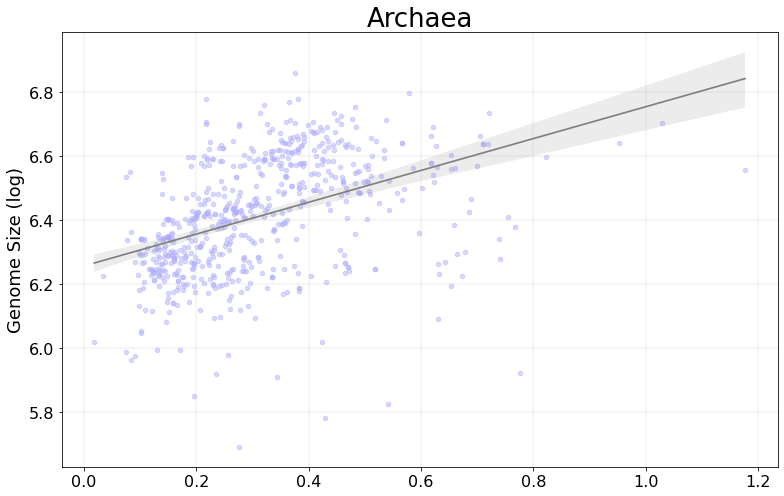

<ipython-input-26-baf8cdfdb795>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_slice.loc[:, 'genome_size'] = grouped_slice['genome_size'].apply(lambda g: math.log(g+1, 10))
<ipython-input-26-baf8cdfdb795>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_slice.loc[:, "coverage"] = grouped_slice["coverage"].apply(lambda g: math.log(g+1, 10))


Eukaryota 0.4830536628691076 1.1656534768455885e-24


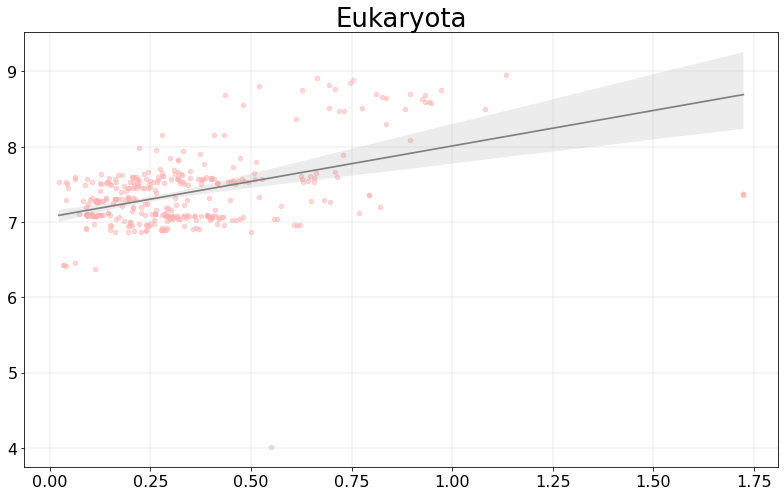

<ipython-input-26-baf8cdfdb795>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_slice.loc[:, 'genome_size'] = grouped_slice['genome_size'].apply(lambda g: math.log(g+1, 10))
<ipython-input-26-baf8cdfdb795>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_slice.loc[:, "coverage"] = grouped_slice["coverage"].apply(lambda g: math.log(g+1, 10))


Bacteria -0.10887739500981562 5.557256446888531e-104


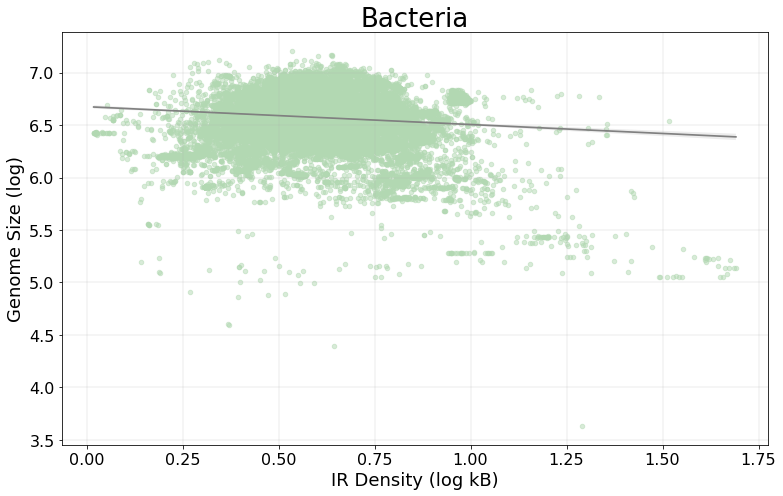

<ipython-input-26-baf8cdfdb795>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_slice.loc[:, 'genome_size'] = grouped_slice['genome_size'].apply(lambda g: math.log(g+1, 10))
<ipython-input-26-baf8cdfdb795>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_slice.loc[:, "coverage"] = grouped_slice["coverage"].apply(lambda g: math.log(g+1, 10))


Viruses 0.15367016128341998 2.009812366669701e-290


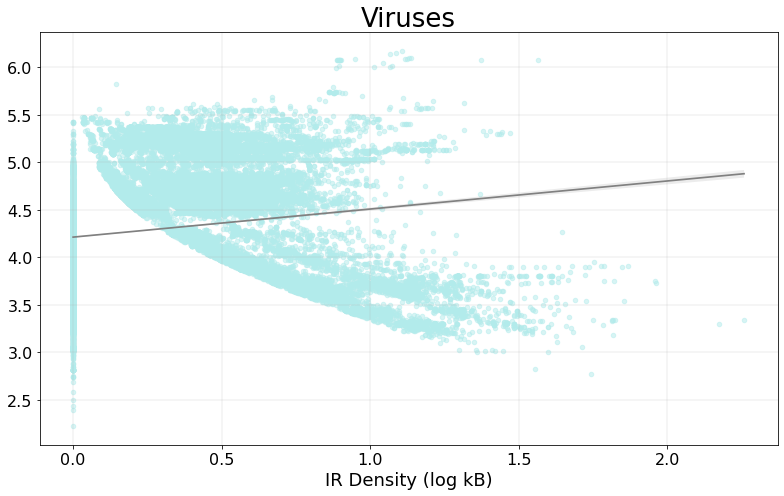

In [26]:
from scipy.stats import pearsonr


for domain in domains:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 7))
    grouped_slice = grouped_genome_size.query(f"superkingdom == '{domain}'")
    grouped_slice.loc[:, 'genome_size'] = grouped_slice['genome_size'].apply(lambda g: math.log(g+1, 10))
    grouped_slice.loc[:, "coverage"] = grouped_slice["coverage"].apply(lambda g: math.log(g+1, 10))
    
    r, p = pearsonr(grouped_slice['coverage'], grouped_slice['genome_size'])
    sns.regplot(data=grouped_slice, color=domain_colors[domain], 
                x="coverage", 
                y="genome_size",  
                ci=95, 
                ax=ax,
               scatter_kws={"color": domain_colors[domain], "alpha": 0.5, 's': 20,}, 
                line_kws={"color": "gray", 
                          "lw": 1.7, 
                          "ls": "-"})
    
    print(domain, r, p)
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    if not (domain == "Viruses" or domain == "Eukaryota"):
        ax.set_ylabel("Genome Size (log)")
    else:
        ax.set_ylabel("")
        
    if not (domain == "Archaea" or domain == "Eukaryota"):
        ax.set_xlabel("IR Density (log kB)")
    else:
        ax.set_xlabel("")
        
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)
    ax.set_title(domain)
    ax.title.set_size(26)
    ax.tick_params(axis="both", which="major", labelsize=16)
    plt.tight_layout()
    fig.savefig(f"/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/new_figs/ir_coverage_vs_genome_size_superkingdoms_{domain}.png", bbox_inches='tight')
    fig.savefig(f"/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/new_figs/ir_coverage_vs_genome_size_superkingdoms_{domain}.pdf", bbox_inches='tight', format="pdf")
    plt.show()

In [27]:
grouped_genome_size_ir = irp_df.groupby("#assembly_accession").agg(
                                                          total_arm_size=("arm_size", lambda ds: ds.sum() * 2), 
                                                          total_gap_size=("gap_size", "sum"),
                                                          genome_size=("genome_size", "first"),
                                                          total_ir=("gap_size", "count"),
                                                          superkingdom=("superkingdom", "first"),
                                    )\
                            .assign(coverage=lambda df: 1000 * (df['total_arm_size'] + df['total_gap_size']).div(df['genome_size']))

grouped_genome_size_ir = pd.concat([grouped_genome_size_ir, empty_assemblies.set_index("#assembly_accession")], axis=0)
grouped_genome_size_ir["total_ir"] = grouped_genome_size_ir["total_ir"].replace(np.nan, 0.0)
grouped_genome_size_ir = grouped_genome_size_ir.assign(genome_size=lambda df: df['genome_size'].apply(lambda y: math.log(y+1, 10)))\
                                                .assign(total_ir=lambda df: df['total_ir'].apply(lambda y: math.log(y+1, 10)))
grouped_genome_size_ir = grouped_genome_size_ir.rename(columns={"superkingdom": "domain"})
grouped_genome_size_ir

,total_arm_size,total_gap_size,genome_size,total_ir,domain,coverage,bioproject,taxid,species_taxid,organism_name,assembly_level,group,gc_percent,total_gene_count,assembly_id,method,tax_id,kingdom,phylum
#assembly_accession,,,,,,,,,,,,,,,,,,,
GCA_000002515.1,12436.0,1475.0,7.028943,2.723456,Eukaryota,1.301412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000002725.2,47940.0,4755.0,7.516603,3.301030,Eukaryota,1.603861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000002765.3,1149134.0,56924.0,7.367218,4.634568,Eukaryota,51.778542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000005825.2,15752.0,2869.0,6.628312,2.795185,Bacteria,4.382187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000005845.2,10478.0,2030.0,6.666673,2.663701,Bacteria,2.694730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_027589855.1,NaN,NaN,3.646011,0.000000,Viruses,NaN,na,2202560.0,2202560.0,Inovirus sp.,Complete Genome,viral,44.0,na,27589855.1,GCA,2202560.0,Loebvirae,Hofneiviricota
GCA_031313985.1,NaN,NaN,3.722881,0.000000,Viruses,NaN,na,2937002.0,2937002.0,Copiparvovirus P192T/pangolin/2018,Complete Genome,viral,40.5,na,31313985.1,GCA,2937002.0,Shotokuvirae,Cossaviricota
GCA_018550795.1,NaN,NaN,3.584444,0.000000,Viruses,NaN,na,2786362.0,2844780.0,ssRNA phage Gerhypos.4_58,Complete Genome,viral,54.5,4,18550795.1,GCA,2786362.0,Orthornavirae,Lenarviricota


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

chunk = grouped_genome_size_ir[["genome_size", "total_ir", "domain"]]
X = chunk[['total_ir']]
y = chunk['genome_size']
lr.fit(X, y)

y_pred = lr.predict(X)

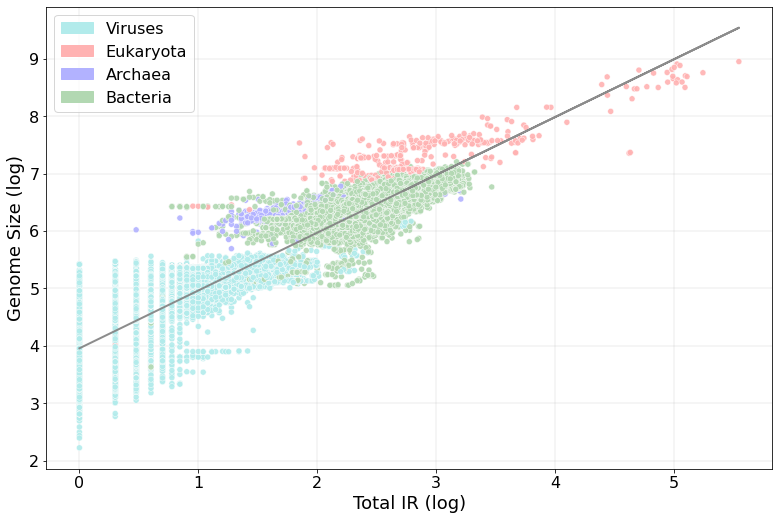

In [30]:
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 8.5))

# xs = np.linspace(np.min(y_pred) - 0.1, np.max(y_pred) + 0.1, 200)
ax.plot(X, y_pred, color='gray', alpha=0.9, lw=2.0, zorder=3)

sns.scatterplot(
               data=chunk,
               x="total_ir",
               y="genome_size",
               hue="domain",
                marker='o',
                # size=14.0,
                ax=ax,
               palette=domain_colors,
             alpha=0.9,
                zorder=2
               )
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_ylabel("Genome Size (log)")
ax.set_xlabel("Total IR (log)")
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)


ax.legend(handles=[mpatches.Patch(color=color, label=domain.capitalize()) for domain, color in domain_colors.items()],
                         frameon=True, 
                             fancybox=True, 
                             shadow=False, 
                              loc=0,
                             title="", 
                             prop={"size": 16})

ax.tick_params(axis="both", which="major", labelsize=16)
fig.savefig("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/new_figs/total_ir_vs_genome_size_superkingdoms.png", bbox_inches='tight')

In [31]:
mean_irp_density_domain = grouped_genome_size.groupby("superkingdom", as_index=False)\
                                            .agg(
                                                mean_coverage=("coverage", "mean"),
                                                std_err_coverage=("coverage", lambda ds: ds.std() / ds.shape[0] ** 0.5)
                                                )
mean_irp_density_domain.to_csv("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/mean_coverage_ir_domain_level.csv")
mean_irp_density_domain['superkingdom'] = pd.Categorical(mean_irp_density_domain['superkingdom'], ["Archaea", "Eukaryota", "Bacteria", "Viruses"])
mean_irp_density_domain.sort_values(by=["superkingdom"], inplace=True)
mean_irp_density_domain

,superkingdom,mean_coverage,std_err_coverage
0,Archaea,1.190805,0.042132
2,Eukaryota,1.706134,0.234160
1,Bacteria,3.328582,0.009546
3,Viruses,1.742961,0.016194


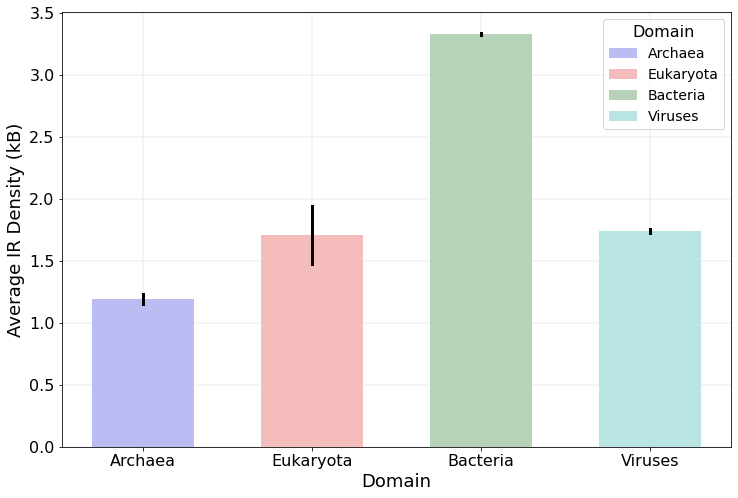

In [32]:
fig = plt.figure(figsize=(12, 8)) 
ax = sns.barplot(x='superkingdom', 
                 y='mean_coverage', 
                 width=0.6, 
                 data=mean_irp_density_domain, 
                 hue="superkingdom", 
                 dodge=False,
                 # legend=False, 
                 palette=[
                        domain_colors['Archaea'],
                        domain_colors['Eukaryota'],
                        domain_colors['Bacteria'],
                        domain_colors['Viruses'],
                       ],
                 alpha=1.0)
fig.add_axes(ax)
for bar in ax.containers[0]:
    bar.set_alpha(1.0)
                

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches if not math.isnan(p.get_height())]
error_vals = mean_irp_density_domain.set_index("superkingdom")['std_err_coverage']
 
handles, labels = ax.get_legend_handles_labels()
for j, label in enumerate(labels):
    std_err = error_vals.loc[label]      
    k = std_err
    ax.plot([x_coords[j], x_coords[j]], [y_coords[j] -k, y_coords[j] + k], color='black', linewidth=3.0)


ax.xaxis.grid(True, linewidth=0.4, alpha=0.6, zorder=0)

# ax.errorbar(x=x_coords, y=y_coords, yerr=mean_irp_density_domain["std_err_coverage"], fmt="none", c="k", zorder=1)
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_axisbelow(True)
ax.set_xlabel("Domain")
ax.set_ylabel("Average IR Density (kB)")
ax.xaxis.label.set_size(18)
legend = ax.legend(prop={"size": 14}, 
                   fancybox=True, 
                   shadow=False, 
                   title='Domain')
plt.setp(legend.get_title(),fontsize=16)


ax.yaxis.label.set_size(18)
ax.tick_params(axis="both",  which="major", labelsize=16)
fig.savefig("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/new_figs/irp_coverage_barplot_superkingdoms.png", bbox_inches='tight')
fig.savefig("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/new_figs/irp_coverage_barplot_superkingdoms.pdf", bbox_inches='tight', format="pdf")
plt.show()

In [33]:
kingdom_color_palette = { # "Viruses": "#b2ebeb",
                          "Viruses": "#87c4c4",
                         # "Bacteria": "#b2d8b2",
                         "Bacteria": "#0fbf2d",
                         # "Archaea": "#b2b2ff",
                         "Archaea": "#7b7bed",
                         "Fungi": "#4d325e",
                         "Plantae": "#b50996",
                        "Animalia": "#9bba2d",
                        "Protista": "#c78f5b"
                        }

In [34]:
irp_df.query("kingdom == 'Plantae' | kingdom == 'Animalia'")['#assembly_accession'].nunique()

38

In [35]:
irp_df.query("kingdom == 'Plantae' | kingdom == 'Animalia' | kingdom == 'Protista'")['#assembly_accession'].nunique()

64

In [36]:
grouped_genome_size.query("kingdom == 'Animalia' | kingdom == 'Plantae' | kingdom == 'Fungi' | kingdom == 'Protista'")

,arm_size,gap_size,genome_size,phylum,kingdom,superkingdom,coverage,bioproject,taxid,species_taxid,organism_name,assembly_level,group,gc_percent,total_gene_count,assembly_id,method,tax_id
#assembly_accession,,,,,,,,,,,,,,,,,,
GCA_000002515.1,12436.0,1475.0,10689156.0,Ascomycota,Fungi,Eukaryota,1.301412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000002725.2,47940.0,4755.0,32855089.0,Euglenozoa,Protista,Eukaryota,1.603861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000002765.3,1149134.0,56924.0,23292622.0,Apicomplexa,Protista,Eukaryota,51.778542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000026945.1,20880.0,2186.0,14618422.0,Ascomycota,Fungi,Eukaryota,1.577872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000090985.2,26664.0,4455.0,20989326.0,Chlorophyta,Plantae,Eukaryota,1.482611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_001640025.1,8466.0,1177.0,15938258.0,Ascomycota,Fungi,Eukaryota,0.605022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCF_003013715.1,2682.0,479.0,12249773.0,Ascomycota,Fungi,Eukaryota,0.258046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCF_011074865.1,5200.0,719.0,10117252.0,Ascomycota,Fungi,Eukaryota,0.585040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
mean_irp_density_kingdom = grouped_genome_size[grouped_genome_size['superkingdom'].isin({'Eukaryota', 'Bacteria', 'Archaea', 'Viruses'})]\
                                            .groupby("kingdom", as_index=False)\
                                            .agg(median_coverage=("coverage", "median"),
                                                 mean_coverage=("coverage", "mean"),
                                                 std_err_coverage=("coverage", lambda ds: ds.std() / (ds.shape[0] ** 0.5) ),
                                                 lower_quantile=("coverage", lambda ds: ds.quantile(0.25)),
                                                 upper_quantile=("coverage", lambda ds: ds.quantile(0.75)),
                                                 domain=("superkingdom", "first"),
                                                 total_species=("superkingdom", "count"),
                                                )\
                                        .assign(kingdom_color=lambda df: df[["domain", "kingdom"]].apply(lambda y: kingdom_color_palette[y['domain']] if y['domain'] in {"Viruses", "Archaea", "Bacteria"} \
                                                                                                                   else kingdom_color_palette[y['kingdom']], axis=1))\
                                        .assign(iqr=lambda df: df["upper_quantile"] - df["lower_quantile"])\
                                        .assign(lower=lambda df: df["lower_quantile"] - 1.5 * df["iqr"])\
                                        .assign(upper=lambda df: df["upper_quantile"] + 1.5 * df["iqr"])\
                                        .dropna(subset=['std_err_coverage'])\
                                        .sort_values(by=["mean_coverage"], ascending=False)\
                                        .reset_index(drop=True)

# mean_irp_density_phyla.to_csv("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/mean_coverage_ir_phylum_level.csv")
mean_irp_density_kingdom

,kingdom,median_coverage,mean_coverage,std_err_coverage,lower_quantile,upper_quantile,domain,total_species,kingdom_color,iqr,lower,upper
0,Protista,1.750993,7.810668,3.190317,0.908396,3.704999,Eukaryota,26,#c78f5b,2.796602,-3.286507,7.899902
1,Plantae,4.917160,4.921169,0.541358,3.231272,7.274561,Eukaryota,26,#b50996,4.043289,-2.833662,13.339495
2,Animalia,3.590219,4.069053,0.917334,1.938826,4.926227,Eukaryota,12,#9bba2d,2.987401,-2.542276,9.407329
3,Eubacteria,2.981526,3.328582,0.009546,2.441049,3.972381,Bacteria,39323,#0fbf2d,1.531332,0.144052,6.269378
4,Shotokuvirae,0.000000,3.040319,0.073916,0.000000,0.000000,Viruses,8763,#87c4c4,0.000000,0.000000,0.000000
5,Sangervirae,0.000000,3.026223,0.074685,0.000000,5.365417,Viruses,3832,#87c4c4,5.365417,-8.048125,13.413542
6,Loebvirae,0.000000,2.599190,0.201379,0.000000,4.687444,Viruses,342,#87c4c4,4.687444,-7.031166,11.718609
7,Bamfordvirae,1.487799,1.577872,0.026389,0.526039,1.913214,Viruses,6105,#87c4c4,1.387176,-1.554724,3.993978
8,Trapavirae,1.188779,1.504094,0.480340,0.000000,2.246014,Viruses,20,#87c4c4,2.246014,-3.369022,5.615036
9,Heunggongvirae,0.888525,1.368815,0.011890,0.000000,1.925094,Viruses,21320,#87c4c4,1.925094,-2.887640,4.812734


In [38]:
mean_irp_density_phyla = grouped_genome_size[grouped_genome_size['superkingdom'].isin({'Eukaryota', 'Bacteria', 'Archaea', 'Viruses'})]\
                                            .groupby("phylum", as_index=False)\
                                            .agg(mean_coverage=("coverage", "mean"),
                                                std_err_coverage=("coverage", lambda ds: ds.std() / (ds.shape[0] ** 0.5) ),
                                                domain=("superkingdom", "first"),
                                                 total_species=("superkingdom", "count"),
                                                 kingdom=("kingdom", "first"),
                                                )\
                                        .assign(kingdom_color=lambda df: df[["domain", "kingdom"]].apply(lambda y: kingdom_color_palette[y['domain']] if y['domain'] in {"Viruses", "Archaea", "Bacteria"} \
                                                                                                                   else kingdom_color_palette[y['kingdom']], axis=1))\
                                        .assign(kingdom=lambda df: df['kingdom'].apply(lambda y: "Viruses" if y not in {"Archaeabacteria", "Eubacteria", "Protista", "Animalia", "Plantae", "Fungi"} else y))\
                                        .dropna(subset=['std_err_coverage'])\
                                        .sort_values(by=["mean_coverage"], ascending=False)\
                                        .reset_index(drop=True)

mean_irp_density_phyla.to_csv("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/mean_coverage_ir_phylum_level.csv")
mean_irp_density_phyla

,phylum,mean_coverage,std_err_coverage,domain,total_species,kingdom,kingdom_color
0,Apicomplexa,12.624023,5.251101,Eukaryota,15,Protista,#c78f5b
1,Candidatus Campbellbacteria,11.994905,5.789398,Bacteria,2,Eubacteria,#0fbf2d
2,Candidatus Gracilibacteria,10.131911,0.184498,Bacteria,2,Eubacteria,#0fbf2d
3,Candidatus Kaiserbacteria,9.750300,0.480890,Bacteria,2,Eubacteria,#0fbf2d
4,Candidatus Nomurabacteria,6.227073,2.090383,Bacteria,3,Eubacteria,#0fbf2d
...,...,...,...,...,...,...,...
87,Thermoproteota,0.602461,0.021413,Archaea,121,Archaeabacteria,#7b7bed
88,Microsporidia,0.545142,0.443485,Eukaryota,5,Fungi,#4d325e
89,Candidatus Woesearchaeota,0.485106,0.222642,Archaea,2,Archaeabacteria,#7b7bed
90,Preplasmiviricota,0.396527,0.025353,Viruses,2014,Viruses,#87c4c4


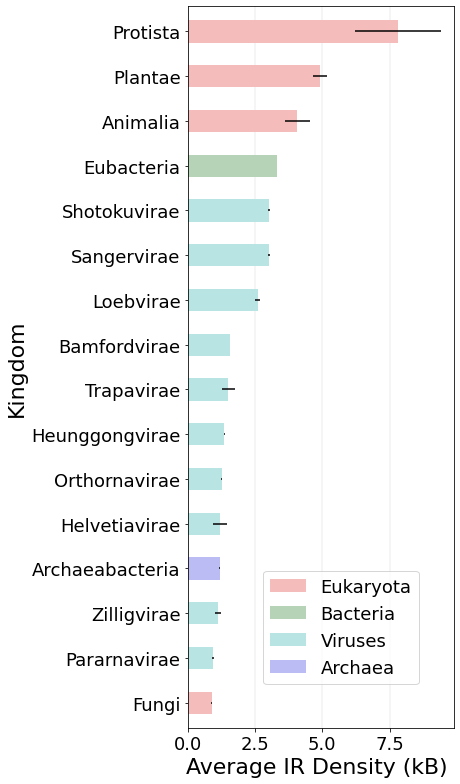

In [171]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 11))
kingdom_palette = mean_irp_density_kingdom.set_index("kingdom")["kingdom_color"].to_dict()
sns.barplot(x='mean_coverage', 
            y='kingdom', 
            orient="h", 
            width=0.5,
            dodge=False,
            xerr=mean_irp_density_kingdom["std_err_coverage"] * 0.5,
            # errorbar=('ci', .95), 
                 data=mean_irp_density_kingdom, 
                 hue="domain", 
                 palette=domain_colors,
                 ax=ax,
                 alpha=1.0
           )

ax.xaxis.grid(True, linewidth=0.4, alpha=0.6, zorder=0)

ax.set_ylabel("Kingdom")
ax.yaxis.label.set_size(22)
ax.legend(bbox_to_anchor=(.25, 0.23), frameon=True, fancybox=True, shadow=False, prop={"size": 18})
# ax.set_xlim(0, 15.0)
ax.set_xlabel(r"Average IR Density (kB) ")
ax.xaxis.label.set_size(22)
ax.tick_params(axis="both",  which="major", labelsize=18)
ax.set_axisbelow(True)
ax.margins(y=0.02)

plt.tight_layout()
fig.savefig("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/new_figs/ir_coverage_over_kingdoms.png", bbox_inches='tight')
fig.savefig("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/new_figs/ir_coverage_over_kingdoms.pdf", bbox_inches='tight', format="pdf")

In [40]:
kingdom_color_palette

{'Viruses': '#87c4c4',
 'Bacteria': '#0fbf2d',
 'Archaea': '#7b7bed',
 'Fungi': '#4d325e',
 'Plantae': '#b50996',
 'Animalia': '#9bba2d',
 'Protista': '#c78f5b'}

In [41]:
mean_irp_density_phyla.sort_values(by=["mean_coverage"], inplace=True, ascending=False)
mean_irp_density_phyla

,phylum,mean_coverage,std_err_coverage,domain,total_species,kingdom,kingdom_color
0,Apicomplexa,12.624023,5.251101,Eukaryota,15,Protista,#c78f5b
1,Candidatus Campbellbacteria,11.994905,5.789398,Bacteria,2,Eubacteria,#0fbf2d
2,Candidatus Gracilibacteria,10.131911,0.184498,Bacteria,2,Eubacteria,#0fbf2d
3,Candidatus Kaiserbacteria,9.750300,0.480890,Bacteria,2,Eubacteria,#0fbf2d
4,Candidatus Nomurabacteria,6.227073,2.090383,Bacteria,3,Eubacteria,#0fbf2d
...,...,...,...,...,...,...,...
87,Thermoproteota,0.602461,0.021413,Archaea,121,Archaeabacteria,#7b7bed
88,Microsporidia,0.545142,0.443485,Eukaryota,5,Fungi,#4d325e
89,Candidatus Woesearchaeota,0.485106,0.222642,Archaea,2,Archaeabacteria,#7b7bed
90,Preplasmiviricota,0.396527,0.025353,Viruses,2014,Viruses,#87c4c4


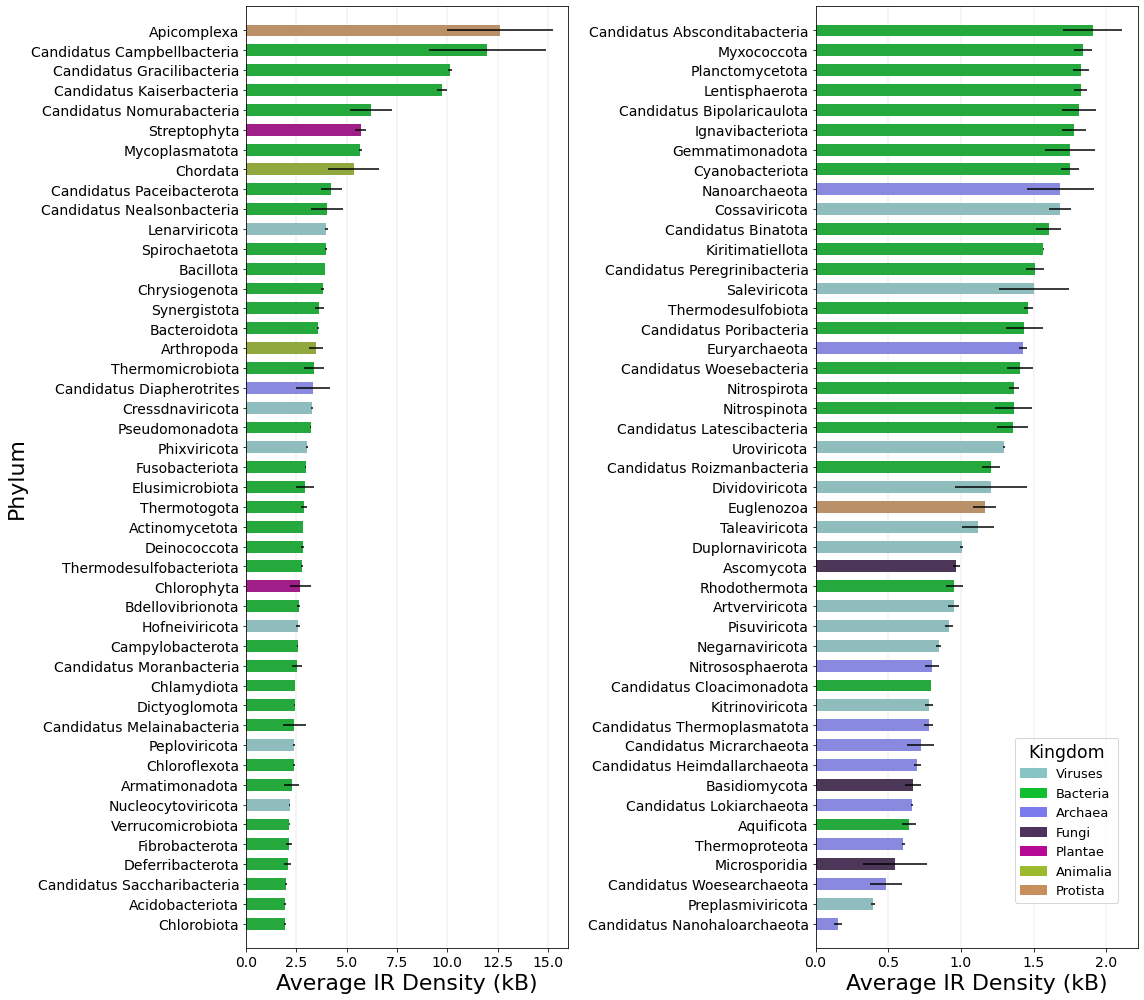

In [164]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 14))

total = mean_irp_density_phyla.shape[0]
kingdom_palette = mean_irp_density_phyla.set_index("kingdom")["kingdom_color"].to_dict()
sns.barplot(x='mean_coverage', y='phylum', orient="h", 
                 width=0.6, 
                 # errorbar=('ci', .95), 
                 data=mean_irp_density_phyla.iloc[:total//2,:], 
                 hue="kingdom", 
                 dodge=False,
                 xerr=mean_irp_density_phyla.iloc[:total//2, :]["std_err_coverage"] * 0.5,
                 palette=kingdom_palette,
                 ax=ax[0],
                 alpha=1.0)
sns.barplot(x='mean_coverage', y='phylum', orient="h", 
                 width=0.6, 
                 # errorbar=('ci', .95), 
                 dodge=False,
                 data=mean_irp_density_phyla.iloc[total//2:,:], 
                 hue="kingdom",
                 xerr=mean_irp_density_phyla.iloc[total//2:,:]["std_err_coverage"] * 0.5,
                 palette=kingdom_palette,
                 ax=ax[1],
                 alpha=1.0)

for i in range(2):
    ax[i].xaxis.grid(True, linewidth=0.4, alpha=0.6, zorder=0)
    if i == 0:
        ax[i].set_ylabel("Phylum")
        ax[i].yaxis.label.set_size(22)
        ax[i].legend(handles=[], frameon=False)
    else:
        ax[i].set_ylabel("")
        ax[i].legend(handles=[mpatches.Patch(color=color, label=kingdom.capitalize()) for kingdom, color in kingdom_color_palette.items()],
                            bbox_to_anchor=(0.96, 0.23), frameon=True, 
                             fancybox=True, 
                             shadow=False, 
                             title="Kingdom", 
                             title_fontsize='xx-large', 
                             prop={"size": 13})
    
        
    # ax[i].set_xlim(0, 15.0)
    ax[i].set_xlabel("Average IR Density (kB)")
    
    ax[i].xaxis.label.set_size(22)
    ax[i].tick_params(axis="both",  which="major", labelsize=14)
    ax[i].set_axisbelow(True)
    ax[i].margins(y=0.02)
    # ax[i].set_ylim(ax[i].get_ylim()[0], ax[i].get_ylim()[1] - 2.0)
    
plt.tight_layout()
fig.savefig("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/new_figs/ir_coverage_over_phylums.png", bbox_inches='tight')

# Risk GC Relative Ratio

In [43]:
def calculate_quantile_df(df, column_name):
    # arm_sizes = df[column_name].sort_values(ascending=True).unique().astype(str)
    
    # outliers
    # outliers = df[~df["odds_ratio"].between(df.lower, df.upper)]
    # p.scatter("arm_size", "ratio", source=outliers, size=6, color="black", alpha=0.3)
    
    # compute quantiles
    qs = df.groupby(column_name)["risk_ratio"].quantile([0.25, 0.5, 0.75])
    qs = qs.unstack().reset_index()
    qs.columns = [column_name, "q1", "q2", "q3"]
    df = pd.merge(df, qs, on=column_name, how="left")

    # compute IQR outlier bounds
    iqr = df.q3 - df.q1
    df["upper"] = df.q3 + 1.5*iqr
    df["lower"] = (df.q1 - 1.5*iqr).apply(lambda x: max(0, x))
    return df

  0%|          | 0/4 [00:00<?, ?it/s]

Archaea


 25%|██▌       | 1/4 [00:04<00:13,  4.50s/it]

Eukaryota


 50%|█████     | 2/4 [00:44<00:51, 25.62s/it]

Bacteria


 75%|███████▌  | 3/4 [04:20<01:52, 112.44s/it]

Viruses


100%|██████████| 4/4 [04:25<00:00, 66.34s/it] 


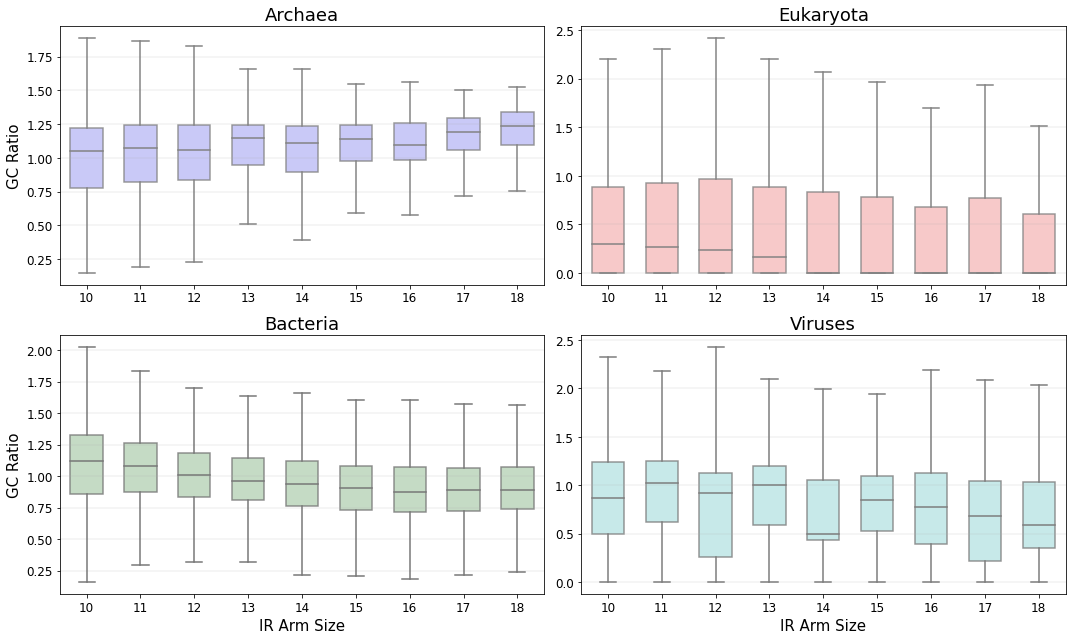

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))
axes = [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]
max_arm_size = 19

for idx, domain in tqdm(enumerate(domains), total=4):
    print(domain)
    cur_ax = axes[idx]
    grouped_slice = irp_df[irp_df['superkingdom'] == domain].query(f"arm_size < {max_arm_size}")
    grouped_slice.to_csv(f"/storage/group/izg5139/default/nicole/inverted_repeats/paper_data/arm_size_vs_risk_gcratio_{domain}.csv", index=False)
    sns.boxplot(data=grouped_slice, 
                x="arm_size", 
                y="risk_ratio", 
                ax=cur_ax, 
                color=domain_colors[domain], 
                width=0.6, 
                showfliers=False,  
                zorder=3, # patch_artist=True, 
                boxprops=dict(alpha=0.8)
               )
    
    if idx == 2 or idx == 3:
        cur_ax.set_xlabel("IR Arm Size")
        cur_ax.xaxis.label.set_size(15)
    else:
        cur_ax.set_xlabel("")
    
    if idx == 0 or idx == 2:
        cur_ax.set_ylabel("GC Enrichment")
        cur_ax.yaxis.label.set_size(15)
    else:
        cur_ax.set_ylabel("")
        
    # cur_ax.set_ylim(ymin=0.0, ymax=2.5)
    cur_ax.tick_params(axis="both", which="major", labelsize=12)
    cur_ax.set_title(domain.capitalize())
    cur_ax.title.set_size(18)
    cur_ax.grid(lw=0.4, alpha=0.6, zorder=0)
    cur_ax.xaxis.grid(False)

plt.tight_layout()
# fig.savefig("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/boxplot_arm_size_vs_gc_ratio_superkingdoms.png", bbox_inches='tight')
# fig.savefig("/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/boxplot_arm_size_vs_gc_ratio_superkingdoms.pdf", bbox_inches='tight', format="pdf")

# Gap Size vs. GC Ratio

  0%|          | 0/4 [00:00<?, ?it/s]

Archaea


 25%|██▌       | 1/4 [00:02<00:06,  2.24s/it]

Eukaryota


 50%|█████     | 2/4 [00:38<00:44, 22.26s/it]

Bacteria


 75%|███████▌  | 3/4 [04:40<02:02, 122.62s/it]

Viruses


100%|██████████| 4/4 [04:49<00:00, 72.48s/it] 


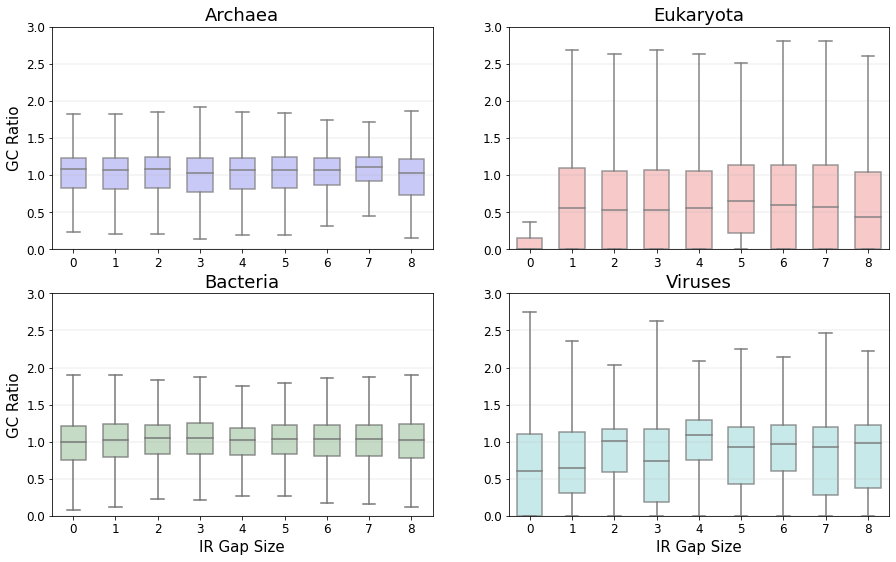

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 9))
axes = [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]
max_arm_size = 31
for idx, domain in tqdm(enumerate(domains), total=4):
    print(domain)
    cur_ax = axes[idx]
    grouped_slice = irp_df[irp_df['superkingdom'] == domain].query(f"arm_size < {max_arm_size}")
    grouped_slice.to_csv(f"/storage/group/izg5139/default/nicole/inverted_repeats/paper_data/gap_size_vs_risk_gcratio_{domain}.csv", index=False)
    sns.boxplot(data=grouped_slice, x="gap_size", y="risk_ratio", ax=cur_ax, color=domain_colors[domain], width=0.6, showfliers=False,  zorder=3, # patch_artist=True, 
                     boxprops=dict(alpha=0.8))
    if idx == 2 or idx == 3:
        cur_ax.set_xlabel("IR Gap Size")
        cur_ax.xaxis.label.set_size(15)
    else:
        cur_ax.set_xlabel("")
    
    if idx == 0 or idx == 2:
        cur_ax.set_ylabel("GC Enrichment")
        cur_ax.yaxis.label.set_size(15)
    else:
        cur_ax.set_ylabel("")
    
    cur_ax.tick_params(axis="both", which="major", labelsize=12)
    cur_ax.set_title(domain.capitalize())
    cur_ax.title.set_size(18)
    cur_ax.grid(lw=0.4, alpha=0.6, zorder=0)
    cur_ax.xaxis.grid(False)
    cur_ax.set_ylim(ymin=0.0, ymax=3.0)

# Arm Size Distribution

 25%|██▌       | 1/4 [00:01<00:03,  1.20s/it]

(24, 2)


 50%|█████     | 2/4 [00:03<00:03,  1.58s/it]

(41, 2)


 75%|███████▌  | 3/4 [00:08<00:03,  3.20s/it]

(41, 2)


100%|██████████| 4/4 [00:09<00:00,  2.36s/it]

(40, 2)


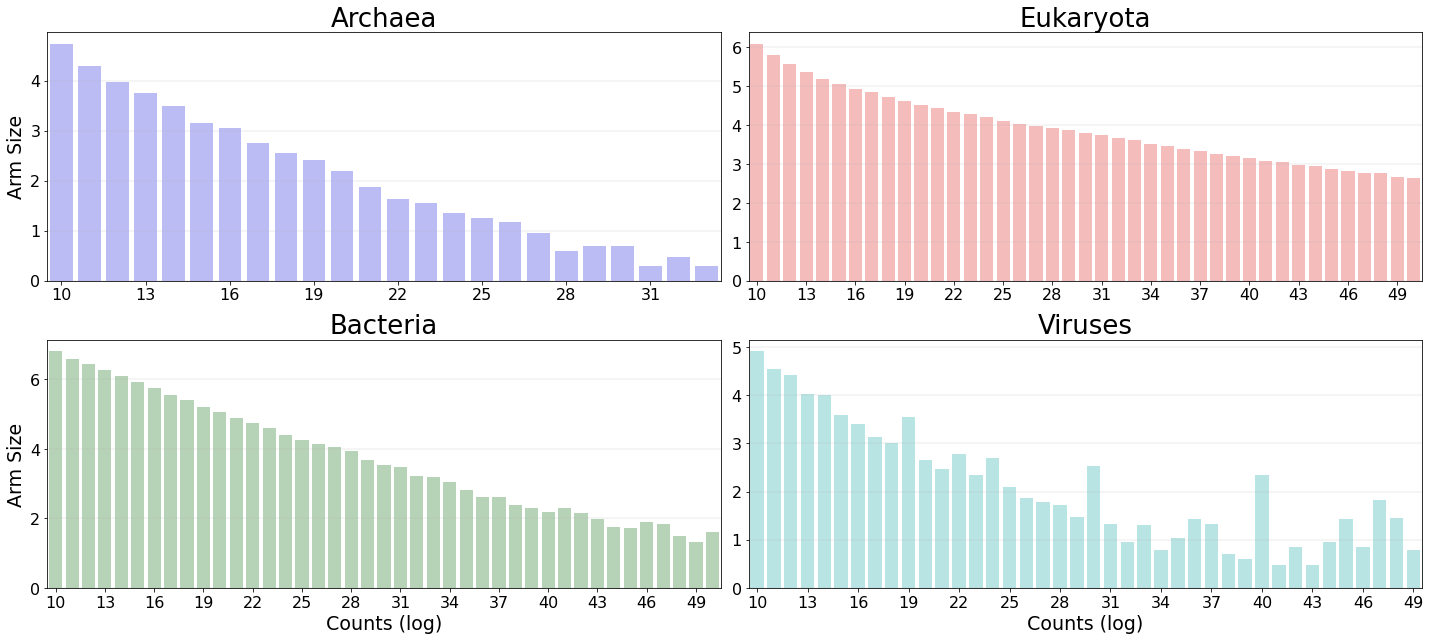

In [152]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 9))
axes = [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]
UPPER_BOUND = 51
for idx, domain in tqdm(enumerate(domains), total=4):
    group_slice = irp_df[(irp_df["superkingdom"] == domain) & (irp_df["arm_size"] < UPPER_BOUND)]\
                                    .arm_size\
                                    .value_counts()\
                                    .apply(lambda c: math.log(c+1, 10))\
                                    .reset_index()\
                                    .rename(columns={"arm_size": "counts", "index": "arm_size"})
    print(group_slice.shape)
    group_slice.to_csv(f"/storage/group/izg5139/default/nicole/inverted_repeats/paper_data/arm_size_log_count_{domain}.csv", mode="w", index=False)
    cur_ax = axes[idx]
    sns.barplot(data=group_slice, x='arm_size', y='counts', color=domain_colors[domain], ax=cur_ax)
    if idx == 2 or idx == 3:
        cur_ax.set_xlabel("Counts (log)")
        cur_ax.xaxis.label.set_size(19)
    else:
        cur_ax.set_xlabel("")
    
    if idx == 0 or idx == 2:
        cur_ax.set_ylabel("Arm Size")
        cur_ax.yaxis.label.set_size(19)
    else:
        cur_ax.set_ylabel("")
    
    cur_ax.set_title(domain.capitalize())
    cur_ax.set_xticks(range(0, group_slice.shape[0], 3))
    cur_ax.tick_params(axis="both", which="major", labelsize=16)
    cur_ax.title.set_size(26)
    cur_ax.grid(lw=0.4, alpha=0.6, zorder=0)
    cur_ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

# Gap Size Distribution

In [68]:
arm_gap_counts = irp_df.groupby(["arm_size", "gap_size"], as_index=False)[["start"]].agg(counts=("start", "count"))\
                .sort_values(by=["counts"], ascending=False)\
                .reset_index(drop=True)\
                .assign(counts=lambda df: df["counts"].apply(lambda y: math.log(y+1)))\
                .query("arm_size < 100")
arm_gap_counts.head(20)

,arm_size,gap_size,counts
0,10,4,14.038930
1,10,5,13.843580
2,11,4,13.750326
3,10,0,13.727905
4,10,6,13.685070
5,10,2,13.557074
6,10,1,13.554380
7,10,3,13.531917
8,10,7,13.484009
9,10,8,13.412516


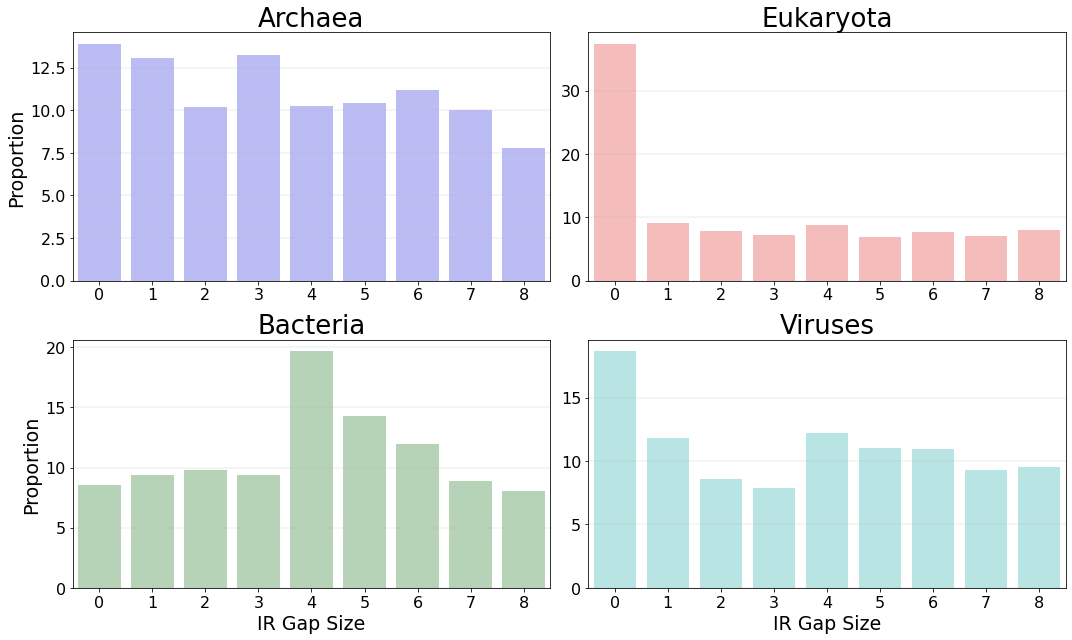

In [151]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))
axes = [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]
for idx, domain in enumerate(domains):
    group_slice = irp_df[irp_df["superkingdom"] == domain]
    total_irp = group_slice.shape[0]
    group_slice = (group_slice.gap_size.value_counts()*100).div(total_irp)\
                                       .reset_index()\
                                       .rename(columns={"gap_size": "counts", 
                                                         "index": "gap_size"})
    
    group_slice.to_csv(f"/storage/group/izg5139/default/nicole/inverted_repeats/paper_data/gap_size_percentage_{domain}.csv", mode="w", index=False)
    cur_ax = axes[idx]
    sns.barplot(data=group_slice, x='gap_size', y='counts', color=domain_colors[domain], ax=cur_ax)
    if idx == 2 or idx == 3:
        cur_ax.set_xlabel("IR Gap Size")
        cur_ax.xaxis.label.set_size(19)
    else:
        cur_ax.set_xlabel("")
    
    if idx == 0 or idx == 2:
        cur_ax.set_ylabel("Proportion")
        cur_ax.yaxis.label.set_size(19)
    else:
        cur_ax.set_ylabel("")
    
    cur_ax.set_title(domain.capitalize())
    cur_ax.title.set_size(26)
    cur_ax.tick_params(axis="both", which="major", labelsize=16)
    cur_ax.grid(lw=0.4, alpha=0.6, zorder=0)
    cur_ax.xaxis.grid(False)
    
plt.tight_layout()


# Most Frequent Words

In [84]:
irp_counts_total = irp_df.groupby("sequenceof_arm")\
                        .agg({"species_taxid": "count",
                              "arm_size": "first",
                             "superkingdom": "unique"
                             })\
                    .assign(length=lambda df: df['superkingdom'].apply(len)
                           )
irp_counts_total

,species_taxid,arm_size,superkingdom,length
sequenceof_arm,,,,
aaaaaaaaaa,2397,10,"[Eukaryota, Archaea, Bacteria, Viruses]",4
aaaaaaaaaaa,695,11,"[Eukaryota, Bacteria, Viruses]",3
aaaaaaaaaaaa,297,12,"[Eukaryota, Bacteria, Viruses]",3
aaaaaaaaaaaaa,153,13,"[Eukaryota, Bacteria, Viruses]",3
aaaaaaaaaaaaaa,89,14,"[Eukaryota, Bacteria, Viruses]",3
...,...,...,...,...
tttttttttttttttttttttttttttttttttttttttttttttta,1,47,[Eukaryota],1
tttttttttttttttttttttttttttttttttttttttttttttttttttttta,1,55,[Bacteria],1
tttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttta,1,63,[Eukaryota],1


In [92]:
irp_counts_total.sort_values(by=["species_taxid"], ascending=False).head(60)

,species_taxid,arm_size,superkingdom,length
sequenceof_arm,,,,
atatatatat,90519,10,"[Eukaryota, Bacteria, Archaea, Viruses]",4
tatatatata,78251,10,"[Eukaryota, Archaea, Bacteria, Viruses]",4
atatatatata,72507,11,"[Eukaryota, Archaea, Bacteria, Viruses]",4
tatatatatat,60893,11,"[Eukaryota, Archaea, Bacteria, Viruses]",4
atatatatatat,49689,12,"[Eukaryota, Bacteria, Archaea, Viruses]",4
tatatatatata,42678,12,"[Eukaryota, Archaea, Bacteria, Viruses]",4
atatatatatata,40600,13,"[Eukaryota, Archaea, Bacteria, Viruses]",4
tatatatatatat,34549,13,"[Eukaryota, Bacteria, Archaea, Viruses]",4
atatatatatatat,30108,14,"[Eukaryota, Archaea, Bacteria, Viruses]",4


In [86]:
irp_counts = irp_df.groupby("sequenceof_arm")\
                        .agg({"species_taxid": "nunique",
                              "arm_size": "first",
                             "superkingdom": "unique"
                             })\
                    .assign(length=lambda df: df['superkingdom'].apply(len)
                           )
irp_counts

,species_taxid,arm_size,superkingdom,length
sequenceof_arm,,,,
aaaaaaaaaa,117,10,"[Eukaryota, Archaea, Bacteria, Viruses]",4
aaaaaaaaaaa,74,11,"[Eukaryota, Bacteria, Viruses]",3
aaaaaaaaaaaa,52,12,"[Eukaryota, Bacteria, Viruses]",3
aaaaaaaaaaaaa,36,13,"[Eukaryota, Bacteria, Viruses]",3
aaaaaaaaaaaaaa,24,14,"[Eukaryota, Bacteria, Viruses]",3
...,...,...,...,...
tttttttttttttttttttttttttttttttttttttttttttttta,1,47,[Eukaryota],1
tttttttttttttttttttttttttttttttttttttttttttttttttttttta,1,55,[Bacteria],1
tttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttta,1,63,[Eukaryota],1


In [103]:
total_species_unique = irp_df['species_taxid'].nunique()
total_species_unique

24700

In [174]:
irp_counts.loc[:, "Rarity Index"] = irp_counts["species_taxid"].div(total_species_unique)
irp_counts.head()

,species_taxid,arm_size,superkingdom,length,Archaea,Eukaryota,Bacteria,Viruses,Rarity Index,a,t
sequenceof_arm,,,,,,,,,,,
aaaaaaaaaa,117,10,"[Eukaryota, Archaea, Bacteria, Viruses]",4,True,True,True,True,0.004737,3,0.0
aaaaaaaaaaa,74,11,"[Eukaryota, Bacteria, Viruses]",3,False,True,True,True,0.002996,3,0.0
aaaaaaaaaaaa,52,12,"[Eukaryota, Bacteria, Viruses]",3,False,True,True,True,0.002105,4,0.0
aaaaaaaaaaaaa,36,13,"[Eukaryota, Bacteria, Viruses]",3,False,True,True,True,0.001457,4,0.0
aaaaaaaaaaaaaa,24,14,"[Eukaryota, Bacteria, Viruses]",3,False,True,True,True,0.000972,4,0.0


In [87]:
irp_counts.sort_values(by=["species_taxid"], ascending=False).head(60)

,species_taxid,arm_size,superkingdom,length
sequenceof_arm,,,,
aaaaacccgc,994,10,"[Bacteria, Viruses]",2
aaaaaacccgc,846,11,"[Bacteria, Viruses]",2
aaaagcccgc,788,10,"[Eukaryota, Bacteria, Viruses]",3
aaagccccgc,760,10,"[Bacteria, Viruses]",2
aaaaaagcgcc,757,11,"[Bacteria, Viruses]",2
aaaaacccgcc,749,11,"[Bacteria, Viruses]",2
aaaaccccgc,738,10,"[Bacteria, Viruses]",2
aaaaggccgc,730,10,"[Bacteria, Viruses]",2
aaaaagcgcc,720,10,"[Bacteria, Viruses]",2


In [93]:
for domain in tqdm(domains):
    irp_counts.loc[:, domain] = irp_counts["superkingdom"].apply(lambda g: domain in g)

irp_counts.head()

100%|██████████| 4/4 [02:09<00:00, 32.43s/it]


,species_taxid,arm_size,superkingdom,length,Archaea,Eukaryota,Bacteria,Viruses
sequenceof_arm,,,,,,,,
aaaaaaaaaa,117,10,"[Eukaryota, Archaea, Bacteria, Viruses]",4,True,True,True,True
aaaaaaaaaaa,74,11,"[Eukaryota, Bacteria, Viruses]",3,False,True,True,True
aaaaaaaaaaaa,52,12,"[Eukaryota, Bacteria, Viruses]",3,False,True,True,True
aaaaaaaaaaaaa,36,13,"[Eukaryota, Bacteria, Viruses]",3,False,True,True,True
aaaaaaaaaaaaaa,24,14,"[Eukaryota, Bacteria, Viruses]",3,False,True,True,True


In [89]:
taxonomic_irp = irp_counts[irp_counts['length'] == 1].query("arm_size < 11")
taxonomic_irp.loc[:, "superkingdom"] = taxonomic_irp["superkingdom"].apply(lambda x: x[0])
taxonomic_irp.head()

,species_taxid,arm_size,superkingdom,length,Archaea,Eukaryota,Bacteria,Viruses
sequenceof_arm,,,,,,,,
aaaaaaacga,8,10,Bacteria,1,False,False,True,False
aaaaaaacgc,8,10,Bacteria,1,False,False,True,False
aaaaaacacc,29,10,Bacteria,1,False,False,True,False
aaaaaacagg,14,10,Bacteria,1,False,False,True,False
aaaaaaccac,30,10,Bacteria,1,False,False,True,False


In [90]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

def generate_cloud(extracted_text, taxonomy=None, ax=None):
    if isinstance(extracted_text, list):
        extracted_text_rejoined = ' '.join(extracted_text)

    wordcloud = WordCloud(width=500, height=400,
                        background_color='white',
                        min_font_size=5,
                        collocations = False,
                          contour_width=3
                          )\
                    .generate(extracted_text_rejoined)

    # fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120)
    ax = plt.gca()
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set_title(taxonomy.capitalize())
    return plt.gcf() # fig

Archaea


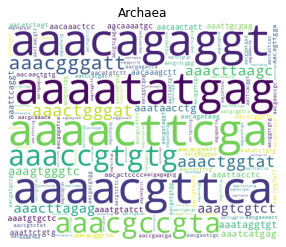

Eukaryota


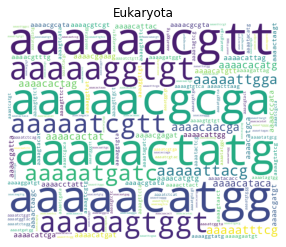

Bacteria


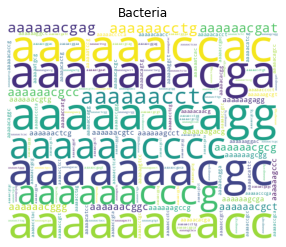

Viruses


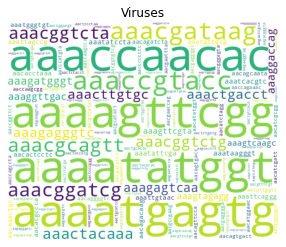

In [173]:
for idx, domain in enumerate(domains):
    group_cloud = taxonomic_irp[taxonomic_irp["superkingdom"] == domain].query("arm_size < 11").reset_index()
    extracted_text = group_cloud.sequenceof_arm.tolist()
    # fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    fig = generate_cloud(extracted_text, domain, ax=None)
    print(domain)
    plt.show()
    fig.savefig(f"/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/taxonomic_cloud_irp_{domain}.png", bbox_inches='tight')
    fig.savefig(f"/storage/group/izg5139/default/nicole/inverted_repeats/paper_graphs/taxonomic_cloud_irp_{domain}.pdf", bbox_inches='tight', format="pdf")